In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score as acc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.naive_bayes import BernoulliNB as BNB
from sklearn.naive_bayes import MultinomialNB as MNB
from sklearn.model_selection import GridSearchCV as GSCV
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz

In [2]:
training = pd.read_csv('dota2Train.csv', header = None)
training = training.loc[:, (training != 0).any(axis=0)] #Removing all 0's attribute
training_data = training.iloc[:,1:]
training_target = training.iloc[:,0]
print("Training Data Shape: ",training.shape)

testing = pd.read_csv('dota2Test.csv', header = None) #Removing all 0's attribute
testing = testing.loc[:, (testing != 0).any(axis=0)]
testing_data = testing.iloc[:,1:]
testing_target = testing.iloc[:,0]
print("Testing Data Shape: ",testing.shape)

Training Data Shape:  (92650, 115)
Testing Data Shape:  (10294, 115)


In [3]:
training.head(5)

,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,112,113,114,115,116
0,-1,223,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,152,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
2,1,131,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
3,1,154,2,2,0,0,0,0,0,0,...,0,-1,0,0,0,0,0,0,0,0
4,-1,171,2,3,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
testing.head(5)

,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,112,113,114,115,116
0,-1,223,8,2,0,-1,0,0,0,0,...,0,-1,0,0,0,0,0,0,0,0
1,1,227,8,2,0,0,0,0,0,0,...,0,-1,0,0,0,0,0,0,0,0
2,-1,136,2,2,1,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,227,2,2,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,184,2,3,0,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0


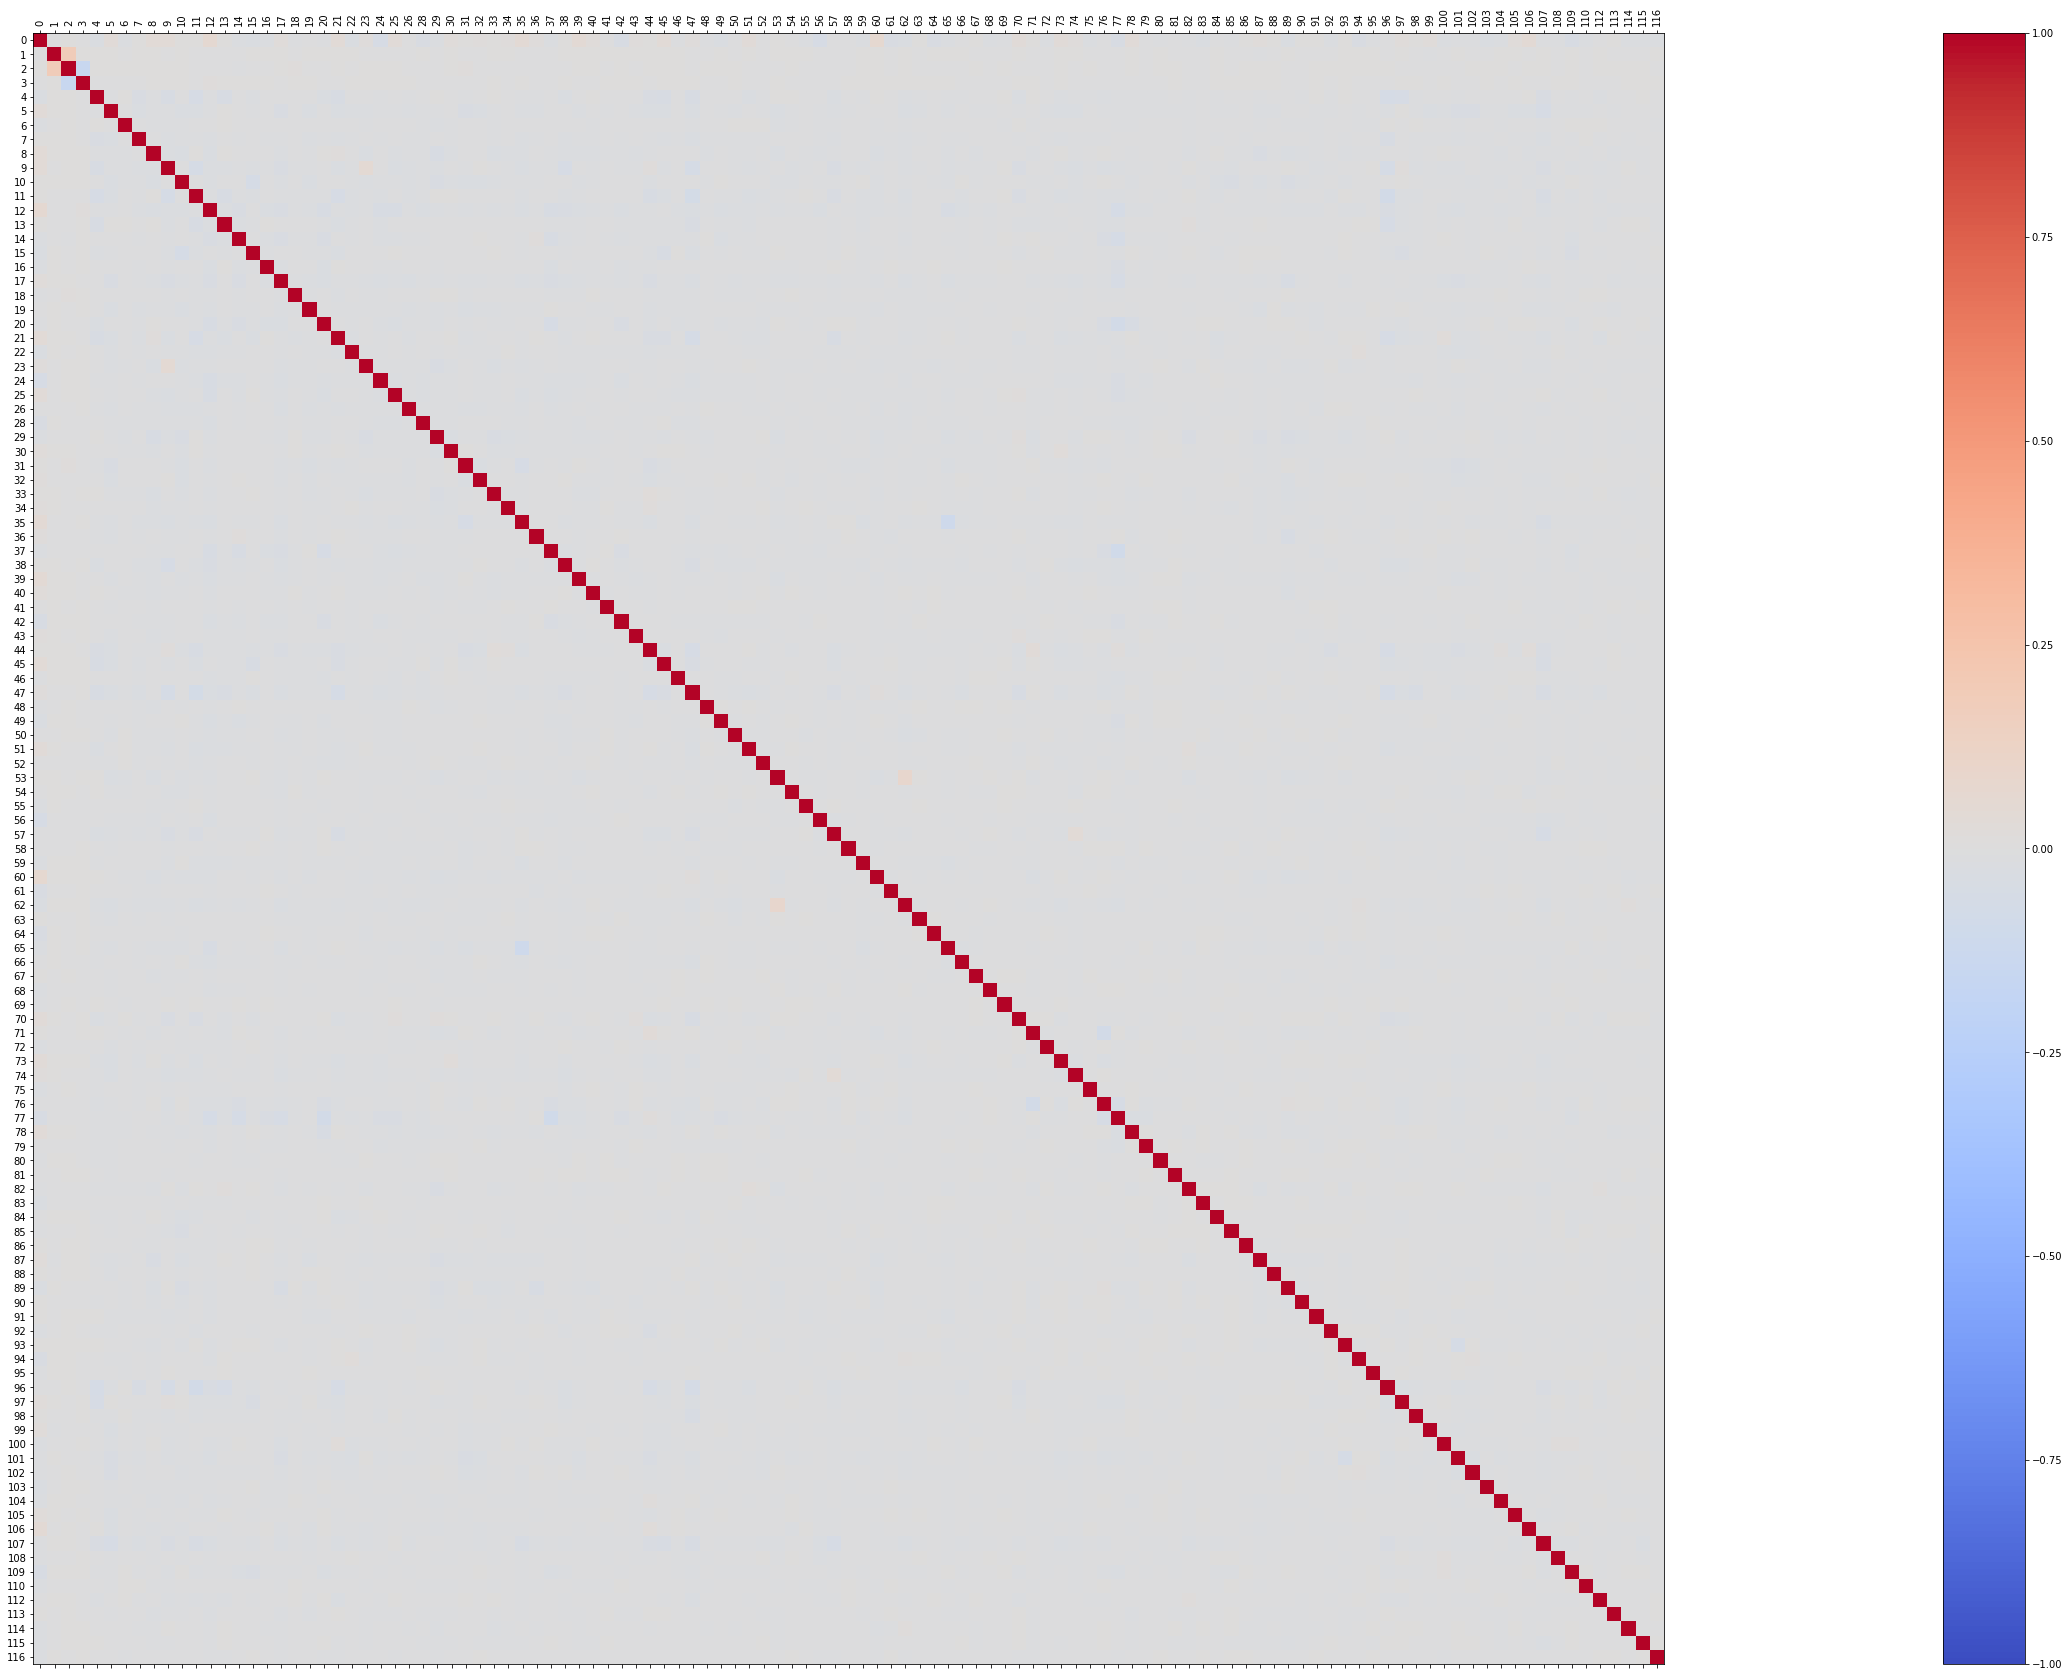

In [5]:
corr = training.corr()
fig = plt.figure(figsize=(100,30))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(training.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(training.columns)
ax.set_yticklabels(training.columns)
plt.show()

## Grid Search on Logistic Regression

In [6]:
log_grid = {'C':[9.96875,10.0,10.03125], 'solver':['lbfgs']}

log_reg = GSCV(LogisticRegression(max_iter=1000, n_jobs=-1), log_grid)
log_reg.fit(training_data,training_target)

print('C:',log_reg.best_estimator_.C)                    #1.0,1.0,10,10,10,10,10
print('Penalty:',log_reg.best_estimator_.penalty)        #l1,l2,l2,l2,l2,l2,l2
print('Solver:',log_reg.best_estimator_.solver)          #liblinear,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs

C: 10.03125
Penalty: l2
Solver: lbfgs


## Logistic Regression

In [7]:
logistic_regressor = LogisticRegression(C=10,solver='lbfgs',max_iter=400,n_jobs=-1)
logistic_regressor.fit(training_data,training_target)
lr_pred = logistic_regressor.predict(testing_data)
print("Accuracy: ", acc(lr_pred, testing_target)*100, "%")

Accuracy:  59.78239751311444 %


# Decision Tree

## Entropy

In [8]:
## 1 ENTROPY
m1, pos1 = -1, -1
FEATURE_NAMES = [' Cluster ID', 'Game mode', 'Game type']
for i in range(1,112):
    FEATURE_NAMES.append('Hero '+str(i))
for i in range(10,21):
    clf1 = DecisionTreeClassifier(criterion = "entropy", max_depth = i)
    clf1 = clf1.fit(training_data,training_target)
    y_pred1 = clf1.predict(testing_data)
    print("Accuracy with depth of Tree as",i,": " , acc(y_pred1, testing_target)*100,"%")
    if acc(y_pred1, testing_target)*100 > m1:
        pos1 = i
        m1 = acc(y_pred1, testing_target)*100
        export_graphviz(clf1, 'tree1.dot', feature_names = FEATURE_NAMES)

! dot -Tpng tree1.dot -o tree1.png

Accuracy with depth of Tree as 10 :  55.15834466679619 %
Accuracy with depth of Tree as 11 :  55.14863027006023 %
Accuracy with depth of Tree as 12 :  55.109772683116375 %
Accuracy with depth of Tree as 13 :  55.3137750145716 %
Accuracy with depth of Tree as 14 :  55.61492131338643 %
Accuracy with depth of Tree as 15 :  55.55663493297066 %
Accuracy with depth of Tree as 16 :  55.595492519914515 %
Accuracy with depth of Tree as 17 :  55.789780454633764 %
Accuracy with depth of Tree as 18 :  55.52749174276277 %
Accuracy with depth of Tree as 19 :  55.28463182436371 %
Accuracy with depth of Tree as 20 :  55.66349329706626 %


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.35619 to fit


## Gini Index

In [9]:
## 2 GINI
m2, pos2 = -1, -1
FEATURE_NAMES = [' Cluster ID', 'Game mode', 'Game type']
for i in range(1,112):
    FEATURE_NAMES.append('Hero '+str(i))
for i in range(15,26):
    clf2 = DecisionTreeClassifier(criterion = "gini", max_depth = i)
    clf2 = clf2.fit(training_data,training_target)
    y_pred2 = clf2.predict(testing_data)
    print("Accuracy with depth of Tree as",i,": " , acc(y_pred2, testing_target)*100,"%")
    if acc(y_pred1, testing_target)*100 > m2:
        pos2 = i
        m2 = acc(y_pred1, testing_target)*100
        export_graphviz(clf1, 'tree2.dot', feature_names = FEATURE_NAMES)

! dot -Tpng tree2.dot -o tree2.png

Accuracy with depth of Tree as 15 :  55.64406450359433 %
Accuracy with depth of Tree as 16 :  55.508062949290846 %
Accuracy with depth of Tree as 17 :  55.66349329706626 %
Accuracy with depth of Tree as 18 :  55.294346221099666 %
Accuracy with depth of Tree as 19 :  55.40120458519526 %
Accuracy with depth of Tree as 20 :  55.624635710122405 %
Accuracy with depth of Tree as 21 :  55.63435010685836 %
Accuracy with depth of Tree as 22 :  55.780066057897805 %
Accuracy with depth of Tree as 23 :  55.03205750922868 %
Accuracy with depth of Tree as 24 :  55.15834466679619 %
Accuracy with depth of Tree as 25 :  55.06120069943656 %


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.259726 to fit


# Naive Bayes

## Bernoulli

In [10]:
bnb = BNB()
bnb.fit(training_data,training_target)
bnb_pred = bnb.predict(testing_data)
print("Accuracy: ", acc(bnb_pred, testing_target)*100, "%")

Accuracy:  57.217796774820286 %


## Gaussian

In [11]:
gnb = GNB()
gnb.fit(training_data,training_target)
gnb_pred = gnb.predict(testing_data)
print("Accuracy: ", acc(gnb_pred, testing_target)*100, "%")

Accuracy:  56.40178744899942 %


##  Multinomial

In [12]:
#MinMaxScaling to avoid negative values to be fed in Multinomial Naive Bayes
mms = MMS()
training_data_temp = mms.fit_transform(training_data)
testing_data_temp = mms.transform(testing_data)

training_data_mms = pd.DataFrame(data=training_data_temp[:,:])
testing_data_mms = pd.DataFrame(data=testing_data_temp[:,:])
training_target_mms = training_target.values.reshape(-1,1)
testing_target_mms = testing_target.values.reshape(-1,1)

mnb = MNB()
mnb.fit(training_data_mms,training_target_mms)
mnb_pred = mnb.predict(testing_data_mms)
print("Accuracy: ", acc(mnb_pred, testing_target)*100, "%")

Accuracy:  53.45832523800272 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# AdaBoost Classifier

In [13]:
abc = ABC(n_estimators=110)
abc.fit(training_data,training_target)
abc_pred = abc.predict(testing_data)
print("Accuracy: ", acc(abc_pred, testing_target)*100, "%")

Accuracy:  59.18981931222071 %
